In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_data = pd.read_csv('/content/u.data', sep='\t',names=['user id','item id','rating','timestamp'])
df_item = pd.read_csv('/content/u.item', sep='|',names=['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')
df_user = pd.read_csv('/content/u.user', sep='|',names=['user id', 'age', 'gender', 'occupation', 'zip code'])

In [3]:
df_data.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df_item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [5]:
df_user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Display univariate plots of the attributes: 
* 'rating', 
* 'age', 
* 'release date',
* 'gender' 
*  'occupation',

from their respective data frames

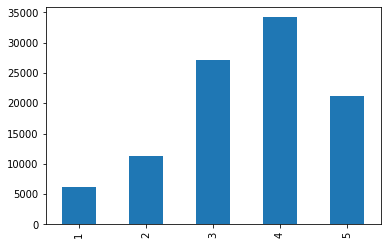

In [6]:
#sns.displot(df_data, x="rating", discrete=True)
df_data['rating'].value_counts().sort_index().plot.bar()

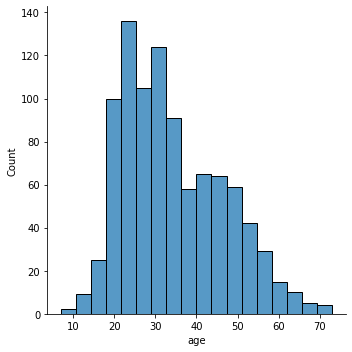

In [7]:
sns.displot(df_user, x="age")
#sns.distplot(df_user.age)

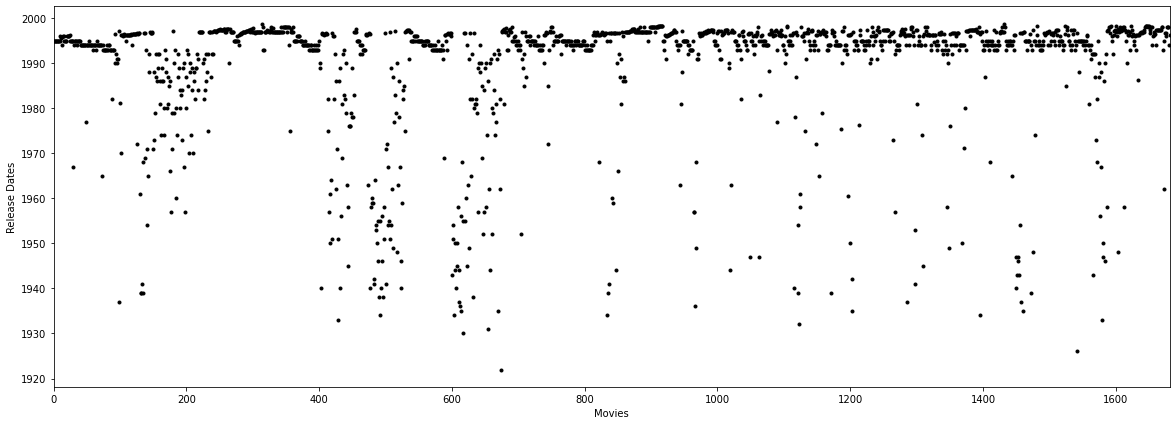

In [8]:
# sns.displot(df_item, x="release date", shrink=.5, )


df_item['release date'] = pd.to_datetime(df_item['release date'])
df_item['release date'].plot(style='k.', figsize=(20, 7)).margins(x=0)
plt.xlabel("Movies")
plt.ylabel("Release Dates")
plt.show()


# import plotly.graph_objects as go
# fig = go.Figure([go.Scatter(y=df_item['release date'])])
# fig.show()

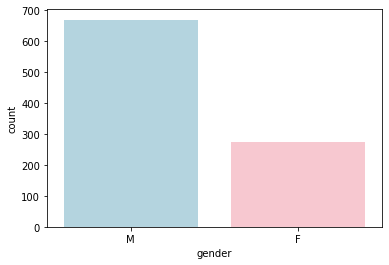

In [9]:
sns.countplot(data = df_user, x = 'gender', palette=['lightblue','pink'])

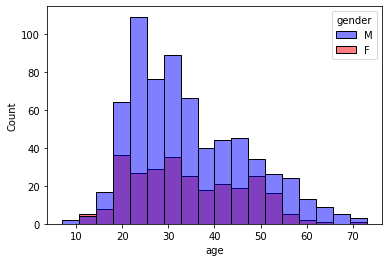

In [10]:
sns.histplot(x='age',data=df_user,hue=df_user['gender'], palette=['blue','red']) 

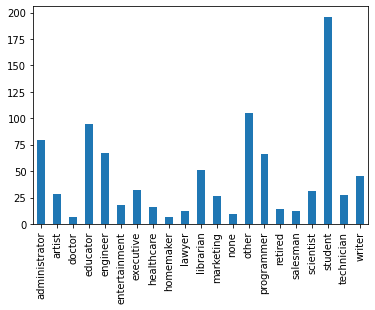

In [11]:
df_user['occupation'].value_counts().sort_index().plot.bar()

Visualize how popularity of Genres has changed over the years.

In [12]:
df_item.drop(columns= 'unknown',inplace=True)

In [13]:
df_item['release_year'] = pd.to_datetime(df_item['release date']).dt.year

df_item['release_year']



0       1995.0
1       1995.0
2       1995.0
3       1995.0
4       1995.0
         ...  
1677    1998.0
1678    1998.0
1679    1998.0
1680    1994.0
1681    1996.0
Name: release_year, Length: 1682, dtype: float64

In [14]:
genre_by_year =df_item.groupby('release_year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year

release_year,1922.0,1926.0,1930.0,1931.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,1938.0,1939.0,1940.0,1941.0,1942.0,1943.0,1944.0,1945.0,1946.0,1947.0,1948.0,1949.0,1950.0,1951.0,1952.0,1953.0,1954.0,1955.0,1956.0,1957.0,1958.0,1959.0,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0
video release date,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,2.0,0.0,5.0,3.0,2.0,6.0,7.0,2.0,8.0,20.0,30.0,40.0,44.0,46.0,12.0
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,3.0,2.0,2.0,4.0,1.0,1.0,1.0,9.0,13.0,22.0,24.0,20.0,3.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,4.0,6.0,9.0,3.0,0.0
Children's,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,6.0,15.0,21.0,21.0,22.0,1.0
Comedy,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,3.0,8.0,3.0,3.0,6.0,6.0,12.0,39.0,82.0,63.0,108.0,87.0,13.0
Crime,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,5.0,7.0,8.0,11.0,21.0,30.0,7.0
Documentary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,9.0,5.0,18.0,6.0,3.0
Drama,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,0.0,3.0,2.0,1.0,0.0,1.0,3.0,1.0,0.0,2.0,3.0,2.0,0.0,0.0,3.0,3.0,2.0,5.0,4.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,1.0,5.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,0.0,1.0,3.0,3.0,2.0,6.0,1.0,5.0,3.0,8.0,5.0,3.0,8.0,12.0,11.0,14.0,64.0,97.0,89.0,170.0,113.0,33.0
Fantasy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,6.0,4.0,1.0


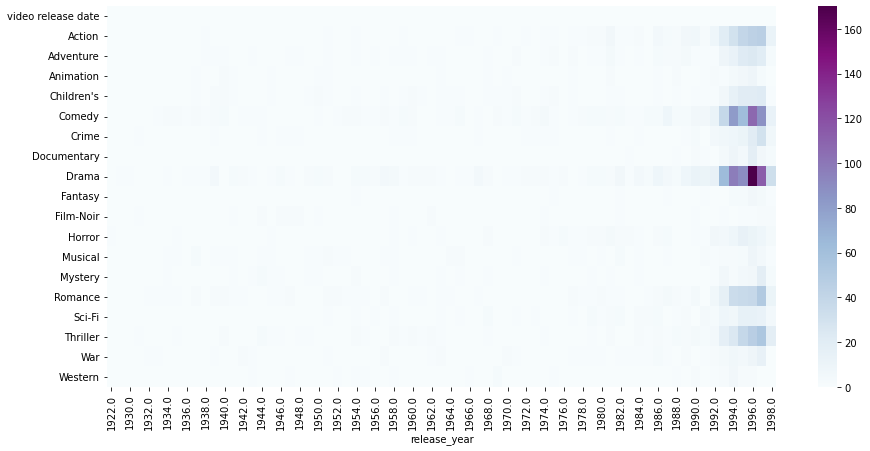

In [15]:
plt.figure(figsize=(15,7)) 
sns.heatmap(genre_by_year, cmap="BuPu")
plt.show()

Display the top 25 movies by average rating, as a list/series/dataframe.

Consider only the movies which received atleast a 100 ratings

In [16]:
movies = df_data.groupby('item id').count()
movies.head()

,user id,rating,timestamp
item id,,,
1,452,452,452
2,131,131,131
3,90,90,90
4,209,209,209
5,86,86,86


Movies has more than 100 rating 

In [17]:
movies = movies[df_data.groupby('item id').count().rating > 100].index
movies = df_data.loc[df_data['item id'].isin(movies)]
movies

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
...,...,...,...,...
99993,913,209,2,881367150
99995,880,476,3,880175444
99996,716,204,5,879795543
99998,13,225,2,882399156


Avarage 

In [18]:
movies =  movies.groupby('item id').mean()


In [19]:
#put in a order all the movies base oon rating
movies = movies.sort_values('rating', ascending = False)
order = movies.index

In [20]:
#get first 25
ratings = movies.rating[0:25]
ratings

item id
408    4.491071
318    4.466443
169    4.466102
483    4.456790
64     4.445230
603    4.387560
12     4.385768
50     4.358491
178    4.344000
134    4.292929
427    4.292237
357    4.291667
98     4.289744
480    4.284916
127    4.283293
285    4.265432
272    4.262626
657    4.259542
474    4.252577
174    4.252381
479    4.251397
313    4.245714
511    4.231214
484    4.210145
172    4.204360
Name: rating, dtype: float64

In [21]:
#using item id get the movies
top_25_movies = df_item.set_index('movie id').loc[order]
top_25_movies = top_25_movies.iloc[0:25, 0]
top_25_movies 


item id
408                                Close Shave, A (1995)
318                              Schindler's List (1993)
169                           Wrong Trousers, The (1993)
483                                    Casablanca (1942)
64                      Shawshank Redemption, The (1994)
603                                   Rear Window (1954)
12                            Usual Suspects, The (1995)
50                                      Star Wars (1977)
178                                  12 Angry Men (1957)
134                                  Citizen Kane (1941)
427                         To Kill a Mockingbird (1962)
357               One Flew Over the Cuckoo's Nest (1975)
98                      Silence of the Lambs, The (1991)
480                            North by Northwest (1959)
127                                Godfather, The (1972)
285                                Secrets & Lies (1996)
272                             Good Will Hunting (1997)
657                    

In [22]:
top_25_movies = top_25_movies.reset_index()
top_25_movies

,item id,movie title
0,408,"Close Shave, A (1995)"
1,318,Schindler's List (1993)
2,169,"Wrong Trousers, The (1993)"
3,483,Casablanca (1942)
4,64,"Shawshank Redemption, The (1994)"
5,603,Rear Window (1954)
6,12,"Usual Suspects, The (1995)"
7,50,Star Wars (1977)
8,178,12 Angry Men (1957)
9,134,Citizen Kane (1941)


In [23]:
#PUTTING ALL TOGETHER
top_25_movies['avg_rating'] =  ratings.values
top_25_movies

,item id,movie title,avg_rating
0,408,"Close Shave, A (1995)",4.491071
1,318,Schindler's List (1993),4.466443
2,169,"Wrong Trousers, The (1993)",4.466102
3,483,Casablanca (1942),4.456790
4,64,"Shawshank Redemption, The (1994)",4.445230
5,603,Rear Window (1954),4.387560
6,12,"Usual Suspects, The (1995)",4.385768
7,50,Star Wars (1977),4.358491
8,178,12 Angry Men (1957),4.344000
9,134,Citizen Kane (1941),4.292929


Verify the following statements
 

*   Men watch more drama than women
*   Men watch more Romance than women
*   Women watch more Sci-Fi than men

In [24]:
merged = pd.merge(df_data, df_user, how='inner', on='user id')
merged.head()

,user id,item id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105


In [25]:
df_item.rename(columns = {'movie id' : 'item id'}, inplace = True)

In [26]:
merged_all = pd.merge(merged, df_item, how='inner', on='item id')
merged_all.head(10)

,user id,item id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,video release date,IMDb URL,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
5,181,242,1,878961814,26,M,executive,21218,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
6,201,242,4,884110598,27,M,writer,E2A4H,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
7,249,242,5,879571438,25,M,student,84103,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
8,13,242,2,881515193,47,M,educator,29206,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0
9,279,242,3,877756647,33,M,programmer,85251,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0


In [27]:
genre_by_gender = merged_all.groupby('gender').sum()
genre_by_gender

,user id,item id,rating,timestamp,age,video release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
gender,,,,,,,,,,,,,,,,,,,,,,,,,
F,12226134,11453179,90901,22750324303258,831781,0.0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,51177156.0
M,34022341,31099834,262085,65602560845604,2465204,0.0,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,147600574.0


In [28]:
genre_by_gender['Drama']

gender
F    11008
M    28887
Name: Drama, dtype: int64

In [29]:
#Men watch more drama than women
M = genre_by_gender.loc['M', 'Drama']
F = genre_by_gender.loc['F', 'Drama']
if M > F:
  print('True')


True


In [30]:
#Men watch more Romance than women
genre_by_gender['Romance']

gender
F     5858
M    13603
Name: Romance, dtype: int64

In [31]:
#Women watch more Sci-Fi than men
genre_by_gender['Sci-Fi']

gender
F     2629
M    10101
Name: Sci-Fi, dtype: int64